##Exploración de la Base de datos


In [43]:
import nltk
#import all the resources for Natural Language with Python
nltk.download("book")
!pip3 install unidecode
#Regex and Standarization
import re
import unidecode
#Extrautil
import random
#DataFrames
!pip3 install pickle5
import pickle5 as pickles
import pandas as pd
#Visualización
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
#Natural Lenguage
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
from nltk import FreqDist, NaiveBayesClassifier, classify
#Subir archivos
from google.colab import files
matplotlib.style.use("ggplot")
pd.options.mode.chained_assignment = None
#Aqui copiamos nuestas base de datos de nuestro directorio en la nube
! git clone https://github.com/LorenzoLeon/bourbaki_NB_analisis_texto


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [44]:
tweets_covid = pd.read_pickle("bourbaki_NB_analisis_texto/01_datos/tweets_small.pickle")

In [45]:
len(tweets_covid)

22000

In [46]:
tweets_covid.dtypes

id_str              int64
text               object
mentions           object
hashes             object
user_name          object
retweeted           int64
inreply           float64
user_followers      int64
fecha              object
type               object
value               int64
value2              int64
dtype: object

In [47]:
tweets_covid.head()

,id_str,text,mentions,hashes,user_name,retweeted,inreply,user_followers,fecha,type,value,value2
1094584,1321164871887736832,?#EnVivo | Ya inicia #CruceInformativo con @Yo...,"@YonAmador, @Claudiashein, @lopezobrador_","#EnVivo, #CruceInformativo, #COVID19, #Derecho...",C21Noticias,0,NaN,1379,2020-10-27T18:00:26Z,negative,67,-1
7315,1332617270649106432,Por instrucción presidencial antes de volver a...,@Claudiashein,"#COVIDー19, #MorenaLaPandemiaDeMexico",MarioPe62068812,1,NaN,29,2020-11-28T08:28:10Z,negative,82,-1
704686,1290080877683200000,@omarfayad El gobernador @OmarFayad primer don...,"@omarfayad, @OmarFayad",#Hidalgo,TeresaC31916268,0,1.290052e+18,48,2020-08-02T22:23:44Z,negative,69,-1
989825,1310405987455717377,Este video debería ser retuiteado miles de vec...,"@HLGatell, @GobiernoMX",NaN,jorgejasso,1,NaN,553,2020-09-28T00:28:28Z,negative,94,-1
299324,1353882730103189504,@AntonioAttolini Yo no le deseo el mal. Solo p...,@AntonioAttolini,NaN,A_Galindo13,1,NaN,1627,2021-01-26T00:49:31Z,negative,99,-1


In [48]:
tweets_covid.fecha[139]

'2020-11-26T00:32:20Z'

In [49]:
tweets_covid.fecha = pd.DatetimeIndex(tweets_covid.fecha).tz_convert("America/Mexico_City")
tweets_covid.fecha[139]

Timestamp('2020-11-25 18:32:20-0600', tz='America/Mexico_City')

In [50]:
tweets_covid.fecha.describe(datetime_is_numeric=True)

count                                  21999
mean     2020-11-19 23:37:22.465826304-06:00
min                2020-07-16 02:16:51-05:00
25%                2020-08-27 09:29:19-05:00
50%                2020-12-01 07:46:21-06:00
75%                2021-01-25 22:34:50-06:00
max                2021-04-05 15:51:43-05:00
Name: fecha, dtype: object

In [51]:
tweets_covid["type"] = tweets_covid["type"].astype("category")
tweets_covid["value2"].describe()

count    22000.000000
mean         0.000000
std          1.000023
min         -1.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: value2, dtype: float64

In [52]:
tweets_covid.sort_index().head()






,id_str,text,mentions,hashes,user_name,retweeted,inreply,user_followers,fecha,type,value,value2
69,1331766676082155520,@h43226013 @Claudiashein Y cuántos niños mexic...,"@h43226013, @Claudiashein","#GobiernoCriminalyCorrupto, #ElPeorGobiernoDeL...",h43226013,1,NaN,1351,2020-11-25 18:08:13-06:00,negative,99,-1
139,1331772748134281220,"? #ÚLTIMAHORA | Por SEGUNDO día consecutivo, s...","@lopezobrador_, @HLGatell","#ÚLTIMAHORA, #Covid_19, #México",MaryTeTe31,1,NaN,351,2020-11-25 18:32:20-06:00,positive,88,1
218,1331780180260622336,Reconoce el Subsecretario de Salud @HLGatell l...,@HLGatell,NaN,Micheguti,1,NaN,90,2020-11-25 19:01:52-06:00,positive,60,1
307,1331788520436936704,@Claudiashein Como jodes con Maradona. Y los ...,@Claudiashein,NaN,Albertus2021,0,1.331724e+18,516,2020-11-25 19:35:01-06:00,negative,100,-1
319,1331790707451965441,Reconoce el Subsecretario de Salud @HLGatell l...,@HLGatell,NaN,IDEY_oficial,1,NaN,4996,2020-11-25 19:43:42-06:00,positive,60,1


In [53]:
tweets_covid.hashes = tweets_covid.hashes.astype(str)
hashes = tweets_covid.hashes[tweets_covid.hashes != "nan"]
hashes.str.split(", ", expand =True).stack().value_counts().head(30)

#COVID19                    4610
#Covid_19                    888
#Covid_19mx                  829
#Covid19                     807
#COVIDー19                    471
#COVID19mx                   405
#COVID                       355
#CuidemosTodosDeTodos        286
#QuedateEnCasa               283
#coronavirus                 278
#COVID__19                   273
#México                      269
#VacunaCOVID19               266
#QuédateEnCasa               251
#Covid                       248
#CovidDerrotaAPuebla         243
#UsaCubrebocas               228
#Oaxaca                      212
#CDMX                        197
#Edoméx                      181
#SputnikV                    166
#Reto40xOax                  157
#DoctorMuerte                147
#SanaDistancia               142
#PorAmorALaVida              138
#MeCuido                     137
#vacuna                      129
#SuSanaDistancia             126
#Covidiotas                  123
#EdoméxEnSemáforoNaranja     122
dtype: int

In [54]:
for i in tweets_covid.index[:10]:
  print("texto: " + tweets_covid.text[i])
  print("usuario: " + tweets_covid.user_name[i])
  print("####")

texto: ?#EnVivo | Ya inicia #CruceInformativo con @YonAmador ?:

??La Jefa de Gobierno, @Claudiashein, da positivo a #COVID19

??@lopezobrador_ declaró tres días de luto nacional en memoria de fallecidos por la pandemia 

#DerechoALaInformación

https://t.co/5ExdY42xus
usuario: C21Noticias
####
texto: Por instrucción presidencial antes de volver al rojo, la @Claudiashein tiene primero que explotar todos los anaranjados posibles o llegar a 120 mil muertes por #COVIDー19 lo que ocurra primero!!

#MorenaLaPandemiaDeMexico https://t.co/urPCNQAIpU
usuario: MarioPe62068812
####
texto: @omarfayad El gobernador @OmarFayad primer donador de plasma contra el COVID-19 en #Hidalgo ,..
usuario: TeresaC31916268
####
texto: Este video debería ser retuiteado miles de veces hasta que @HLGatell tenga pesadillas con él. Ojalá que México no olvide NUNCA lo que este @GobiernoMX de tres centavos y este individuo hizo con la crisis del COVID en 2020. https://t.co/rkdd47cqMD
usuario: jorgejasso
####
texto: @An

In [55]:
texto = tweets_covid.text[678023]
texto

'Mis respetos para @A__Tapia, ayer día 29, ?? cerró en 45,361?#Covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @HLGatell con 46,000?por 45,999?de ??, #morenavirus @obititlan https://t.co/efM0Vc1Mrc'

In [56]:
texto.split()

['Mis',
 'respetos',
 'para',
 '@A__Tapia,',
 'ayer',
 'día',
 '29,',
 '??',
 'cerró',
 'en',
 '45,361?#Covid_19',
 'a',
 'tan',
 'sólo',
 '600',
 'de',
 '??,',
 'hoy',
 '??',
 'ha',
 'rebasado',
 'a',
 'Reino',
 'Unido',
 '??',
 'en?#COVID19',
 'para',
 'ocupar',
 'el',
 '3°',
 'lugar',
 'mundial',
 'como',
 'resultado',
 'del',
 'trabajo',
 '(sic)',
 'de',
 '@HLGatell',
 'con',
 '46,000?por',
 '45,999?de',
 '??,',
 '#morenavirus',
 '@obititlan',
 'https://t.co/efM0Vc1Mrc']

In [57]:
texto = re.sub(r"https?:\/\/\S*", "liga", texto)
texto

'Mis respetos para @A__Tapia, ayer día 29, ?? cerró en 45,361?#Covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @HLGatell con 46,000?por 45,999?de ??, #morenavirus @obititlan liga'

In [58]:
texto = re.sub(r"@\S*", "@mencion", texto)
texto

'Mis respetos para @mencion ayer día 29, ?? cerró en 45,361?#Covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @mencion con 46,000?por 45,999?de ??, #morenavirus @mencion liga'

In [59]:
texto = re.sub('°¡$¿?!&', " ", texto)
texto
#Revisar este tema por que no se quitaron los caracteres especiales

'Mis respetos para @mencion ayer día 29, ?? cerró en 45,361?#Covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @mencion con 46,000?por 45,999?de ??, #morenavirus @mencion liga'

In [60]:
texto = re.sub(r"\s+", " ",texto)
texto

'Mis respetos para @mencion ayer día 29, ?? cerró en 45,361?#Covid_19 a tan sólo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3° lugar mundial como resultado del trabajo (sic) de @mencion con 46,000?por 45,999?de ??, #morenavirus @mencion liga'

In [61]:
unidecode.unidecode(texto)

'Mis respetos para @mencion ayer dia 29, ?? cerro en 45,361?#Covid_19 a tan solo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3deg lugar mundial como resultado del trabajo (sic) de @mencion con 46,000?por 45,999?de ??, #morenavirus @mencion liga'

In [62]:
tweets_covid_limpia = tweets_covid.copy()
tweets_covid_limpia["text"] = tweets_covid_limpia["text"].apply(lambda x: x.lower())
tweets_covid_limpia["text"] = tweets_covid_limpia["text"].apply(lambda x: re.sub(r"https?:\/\/\S*", " ", x))
tweets_covid_limpia["text"] = tweets_covid_limpia["text"].apply(lambda x: re.sub(r"@\S*"                      ,"@mencion", x))
tweets_covid_limpia["text"] = tweets_covid_limpia["text"].apply(lambda x: re.sub('°¡$¿?!&', " ", texto))

tweets_covid_limpia["text"] = tweets_covid_limpia["text"].apply(lambda x: re.sub(r"\s+          "," "                     , x))
tweets_covid_limpia["text"] = tweets_covid_limpia["text"].apply(lambda x: unidecode.unidecode(x))
tweets_covid_limpia.text[678023]

'Mis respetos para @mencion ayer dia 29, ?? cerro en 45,361?#Covid_19 a tan solo 600 de ??, hoy ?? ha rebasado a Reino Unido ?? en?#COVID19 para ocupar el 3deg lugar mundial como resultado del trabajo (sic) de @mencion con 46,000?por 45,999?de ??, #morenavirus @mencion liga'

<function matplotlib.pyplot.show>

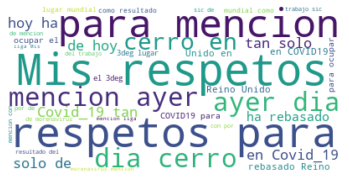

In [63]:
tweets_positivos = tweets_covid_limpia[tweets_covid_limpia ["type"] == "positive"]
union_texto = " ".join([texto for texto in tweets_positivos.text])
union_texto
word_cloud = WordCloud(background_color="white").generate(union_texto)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show

In [64]:
stop_words_es = set(stopwords.words ("spanish"))
stop_words_es = stop_words_es.union ("covid")

In [65]:
tokens = word_tokenize(texto, language="spanish")
tokens_filtrados = [palabra for palabra in tokens if not palabra in stop_words_es]
tokens_filtrados

['Mis',
 'respetos',
 '@',
 'mencion',
 'ayer',
 'día',
 '29',
 ',',
 '?',
 '?',
 'cerró',
 '45,361',
 '?',
 '#',
 'Covid_19',
 'tan',
 'sólo',
 '600',
 '?',
 '?',
 ',',
 'hoy',
 '?',
 '?',
 'rebasado',
 'Reino',
 'Unido',
 '?',
 '?',
 '?',
 '#',
 'COVID19',
 'ocupar',
 '3°',
 'lugar',
 'mundial',
 'resultado',
 'trabajo',
 '(',
 'sic',
 ')',
 '@',
 'mencion',
 '46,000',
 '?',
 '45,999',
 '?',
 '?',
 '?',
 ',',
 '#',
 'morenavirus',
 '@',
 'mencion',
 'liga']

<function matplotlib.pyplot.show>

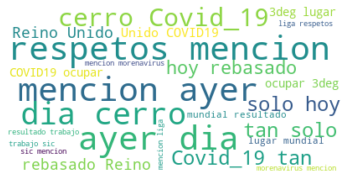

In [66]:
tweets_positivos = tweets_covid_limpia[tweets_covid_limpia ["type"] == "positive"]
union_texto = " ".join([texto for texto in tweets_positivos.text])
union_texto
word_cloud = WordCloud(background_color="white", stopwords=stop_words_es).generate(union_texto)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show

In [67]:
todas_las_palabras = []
for fila in tweets_covid_limpia.text:
  for palabra in word_tokenize(fila, language="spanish"):
    if palabra not in stop_words_es:
      todas_las_palabras.append(palabra)

todas_las_palabras = FreqDist(todas_las_palabras)

palabras_caracteristicas = list (todas_las_palabras.keys())[:5000]
todas_las_palabras.most_common(15)

[('?', 308000),
 ('@', 66000),
 ('mencion', 66000),
 (',', 66000),
 ('#', 66000),
 ('Mis', 22000),
 ('respetos', 22000),
 ('ayer', 22000),
 ('dia', 22000),
 ('29', 22000),
 ('cerro', 22000),
 ('45,361', 22000),
 ('Covid_19', 22000),
 ('tan', 22000),
 ('solo', 22000)]

In [68]:
len(todas_las_palabras)

34

In [69]:
corpus =[(list(word_tokenize(text, language="spanish")), sentiment) 
  for sentiment, text in zip(tweets_covid_limpia["type"], tweets_covid_limpia.text)]
random.shuffle(corpus)


In [70]:
def buscar_caracteristicas(documento):
  palabras = set(documento)
  caracteristicas = {}
  for palabra in palabras_caracteristicas:
    caracteristicas[palabra] = (palabra in palabras)
  return caracteristicas

In [71]:
text, sentiment = corpus[1]
buscar_caracteristicas(text)
set_caratectisticas_bd = [buscar_caracteristicas(text) for (text, sentiment) in corpus]


In [72]:
numero_tweets = len(set_caratectisticas_bd)
porcentaje_80= int(round(numero_tweets* .8,0))
set_entrenamiento = set_caratectisticas_bd[:porcentaje_80]
set_pueba = set_caratectisticas_bd[porcentaje_80:]

In [73]:
classificador_NB = NaiveBayesClassifier.train(set_entrenamiento)


ValueError: ignored

In [ ]:
print(text)
classificador_NB.classify(buscar_caracteristicas(text))

In [ ]:
classificador_NB.show_most_informative_features(15)

In [ ]:
classify.accuracy(classificador_NB, set_prueba)


In [ ]:
print("Precision del clasificador: ", str(round(classify.accuracy(classificador_NB, set_pueba)*100, 2)) + "%")

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stemmer = SnowballStemmer("spanish")
for palabras in word_tokenize (tweets_covid_limpia.text[62527]):
  if palabra not in stop_words_es:
    print("Original: "+ palabra.ljust(12) + "Raiz: " +stemmer.stem(palabra))

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from nltk.classify.scikitlearn import SklearnClassifier

In [ ]:
multi_clasificador = SklearnClassifier(MultinomialNB(alpha=2))
multi_clasificador.train(set_entrenamiento)

In [ ]:
print("Precisión Multinominal: " + str(classify.accuracy(multi_clasificador, set_pueba)*100 + "%"))

In [ ]:
bernu_clasificador = SklearnClassifier(BernoulliNB(alpha=10))

In [ ]:
n = 7
nombres_classe = multi_clasificador._clf.classes_
nombres_caracteristicas = multi_clasificador._vectorizer.get_feature_names()
top_clase1 = sorted(zip(multi_clasificador._clf.coef_[0]), nombres_caracteristicas)[:n] 
top_clase2 = sorted(zip(multi_clasificador._clf.coef_[0]), nombres_caracteristicas)[-n:] 
for coef, palabra in top_clase1:
  print(nombres_classe[0], coef, palabra)
  for coef, palabra in top_clase2:
  print(nombres_classe[1], coef, palabra)